In [1]:
#pip install sodapy

In [2]:
from sodapy import Socrata
import pandas as pd
#from google.colab import drive
import re

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exploratory Data Analysis on the NYC 311 Service request open data

This data analysis project is to explore the open data of NYC 311 Service Requests. In this project I explore the data based on several attributes/columns to create informative visuals. I examine the top complaint that is called in and in each borough. I analyze which community board is most affected by heat or hot water issues based on the frequency in those complaints in each community board. I also analyze frequency of total calls by hour and agency.  

In [4]:
client = Socrata("data.cityofnewyork.us", None)

client.timeout = 1000
results = client.get("erm2-nwe9", limit=150000)

In [5]:
# Creating a DataFrame from client results using pandas library
df = pd.DataFrame.from_records(results)

In [6]:
# Getting information on the attributes/columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   unique_key                      150000 non-null  object
 1   created_date                    150000 non-null  object
 2   agency                          150000 non-null  object
 3   agency_name                     150000 non-null  object
 4   complaint_type                  150000 non-null  object
 5   descriptor                      148797 non-null  object
 6   location_type                   131322 non-null  object
 7   incident_zip                    147670 non-null  object
 8   incident_address                142723 non-null  object
 9   street_name                     142719 non-null  object
 10  cross_street_1                  91413 non-null   object
 11  cross_street_2                  91425 non-null   object
 12  intersection_street_1         

In [7]:
df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,closed_date,resolution_description,resolution_action_updated_date,taxi_pick_up_location,bridge_highway_direction,facility_type,due_date,road_ramp,taxi_company_borough,vehicle_type
0,53090551,2022-01-18T01:06:58.000,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,11229,3395 NOSTRAND AVENUE,NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53089881,2022-01-18T01:06:11.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,Street/Sidewalk,11203,659 EAST 43 STREET,EAST 43 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53087157,2022-01-18T01:05:35.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11103,42-02 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53092900,2022-01-18T01:04:47.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11691,51-24 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53088365,2022-01-18T01:04:34.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11378,56-07 ARNOLD AVENUE,ARNOLD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# check null values
df.isnull().sum()

unique_key                             0
created_date                           0
agency                                 0
agency_name                            0
complaint_type                         0
descriptor                          1203
location_type                      18678
incident_zip                        2330
incident_address                    7277
street_name                         7281
cross_street_1                     58587
cross_street_2                     58575
intersection_street_1              64112
intersection_street_2              64042
address_type                        1395
city                                6521
landmark                           74168
status                                 0
community_board                        0
bbl                                15771
borough                                0
x_coordinate_state_plane            1880
y_coordinate_state_plane            1850
open_data_channel_type                 0
park_facility_na

In [9]:
#exclude unnecessary columns
df = df[['unique_key', 'created_date', 'complaint_type', 'agency', 'agency_name', 'community_board', 
         'latitude', 'longitude', 'descriptor', 'borough', 'incident_zip', 'incident_address', 'street_name', 'city', 'status','resolution_description', 'resolution_action_updated_date', 'closed_date']]

In [10]:
df.head()

,unique_key,created_date,complaint_type,agency,agency_name,community_board,latitude,longitude,descriptor,borough,incident_zip,incident_address,street_name,city,status,resolution_description,resolution_action_updated_date,closed_date
0,53090551,2022-01-18T01:06:58.000,Illegal Parking,NYPD,New York City Police Department,15 BROOKLYN,40.60137819735678,-73.9420578963724,Double Parked Blocking Vehicle,BROOKLYN,11229,3395 NOSTRAND AVENUE,NOSTRAND AVENUE,BROOKLYN,In Progress,NaN,NaN,NaN
1,53089881,2022-01-18T01:06:11.000,Abandoned Vehicle,NYPD,New York City Police Department,17 BROOKLYN,40.63888794628109,-73.93579187660711,With License Plate,BROOKLYN,11203,659 EAST 43 STREET,EAST 43 STREET,BROOKLYN,In Progress,NaN,NaN,NaN
2,53087157,2022-01-18T01:05:35.000,Noise - Commercial,NYPD,New York City Police Department,01 QUEENS,40.75815548347174,-73.91727876742766,Loud Music/Party,QUEENS,11103,42-02 BROADWAY,BROADWAY,ASTORIA,In Progress,NaN,NaN,NaN
3,53092900,2022-01-18T01:04:47.000,Noise - Residential,NYPD,New York City Police Department,14 QUEENS,40.59521202014285,-73.78274957228403,Banging/Pounding,QUEENS,11691,51-24 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,FAR ROCKAWAY,In Progress,NaN,NaN,NaN
4,53088365,2022-01-18T01:04:34.000,Illegal Parking,NYPD,New York City Police Department,05 QUEENS,40.71499072695339,-73.90900316386886,Blocked Hydrant,QUEENS,11378,56-07 ARNOLD AVENUE,ARNOLD AVENUE,MASPETH,In Progress,NaN,NaN,NaN


In [11]:
df.complaint_type.unique()

array(['Illegal Parking', 'Abandoned Vehicle', 'Noise - Commercial',
       'Noise - Residential', 'Encampment', 'Blocked Driveway',
       'Consumer Complaint', 'Dirty Condition',
       'Vaccine Mandate Non-Compliance', 'Non-Residential Heat',
       'Noise - Street/Sidewalk', 'Noise - Vehicle',
       'Street Sign - Damaged', 'Bus Stop Shelter Complaint',
       'Taxi Complaint', 'Rodent', 'Panhandling', 'PAINT/PLASTER',
       'HEAT/HOT WATER', 'DOOR/WINDOW', 'Lead', 'Street Sign - Dangling',
       'Indoor Air Quality', 'Obstruction', 'Noise', 'PLUMBING',
       'Missed Collection', 'Lot Condition', 'WATER LEAK', 'Dead Animal',
       'Sewer', 'Food Establishment', 'UNSANITARY CONDITION',
       'Mobile Food Vendor', 'Graffiti', 'Residential Disposal Complaint',
       'Wood Pile Remaining', 'GENERAL', 'New Tree Request',
       'Animal-Abuse', 'Broken Parking Meter',
       'Sanitation Worker or Vehicle Complaint', 'SAFETY', 'Water System',
       'Street Condition', 'Root/Sewer/

In [12]:
df.agency.unique()

array(['NYPD', 'DHS', 'DCA', 'DSNY', 'DOHMH', 'DOT', 'TLC', 'HPD', 'DEP',
       'DPR', 'EDC', 'DOB',
       'MAYORâ\x80\x99S OFFICE OF SPECIAL ENFORCEMENT', 'DOE', 'DFTA',
       'DOITT'], dtype=object)

In [13]:
def update_OSE(agency):
  """Takes in an agency name and converts to abbreviated form, if the agency is
     the Office of Special Enforcement."""

  if agency == 'MAYORâ\x80\x99S OFFICE OF SPECIAL ENFORCEMENT':
      return "OSE"
  else:
      return agency
    
df.agency = df.agency.map(lambda agency: update_OSE(agency))

In [14]:
noise_columns = []

for i in df.complaint_type:
   if i.startswith('Noise') and i not in noise_columns:
     noise_columns.append(i)
noise_columns

['Noise - Commercial',
 'Noise - Residential',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Noise',
 'Noise - Helicopter',
 'Noise - Park',
 'Noise - House of Worship']

In [15]:
#Label unspecified noise complaints as 'Noise - Unspecified'
# Takes in an complaint name and updates it, if it is an unspecified noise complaint.
def update_noise(complaint):
  if complaint == 'Noise':
    return "Noise - Unspecified"
  else:
    return complaint
    
df.complaint_type = df.complaint_type.map(
    lambda complaint: update_noise(complaint))

In [16]:
type(df.created_date[1])

str

In [17]:
#convert date column to datetime 
df['created_date'] = pd.to_datetime(df['created_date'], 
                                    format='%Y-%m-%dT%H:%M:%S.%f')

In [18]:
#check new data type for created_date column
type(df['created_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# create new columns with the day, month, day of week, and hour of each call. 
# This will allow us to explore the independent relationship of each variable to other characteristics of the calls.

In [20]:
df['day'] = [str(i.date()) for i in df.created_date]
df['month'] = [int(i.month) for i in df.created_date]
df['day_of_week'] = [int(i.weekday()) for i in df.created_date]
df['hour'] = [int(i.hour) for i in df.created_date]

In [21]:
df['day'].unique()

array(['2022-01-18', '2022-01-17', '2022-01-16', '2022-01-15',
       '2022-01-14', '2022-01-13', '2022-01-12', '2022-01-11',
       '2022-01-10', '2022-01-09', '2022-01-08', '2022-01-07',
       '2022-01-06', '2022-01-05', '2022-01-04', '2022-01-03',
       '2022-01-02', '2022-01-01', '2021-12-31', '2021-12-30',
       '2021-12-29', '2021-12-28', '2021-12-27'], dtype=object)

In [22]:
df[df['day'] == '2022-01-14']

,unique_key,created_date,complaint_type,agency,agency_name,community_board,latitude,longitude,descriptor,borough,...,street_name,city,status,resolution_description,resolution_action_updated_date,closed_date,day,month,day_of_week,hour
23828,53061590,2022-01-14 23:59:46,Illegal Parking,NYPD,New York City Police Department,03 BROOKLYN,40.6791471172615,-73.93848595157297,Blocked Hydrant,BROOKLYN,...,ALBANY AVENUE,BROOKLYN,Closed,The Police Department issued a summons in resp...,2022-01-15T00:39:08.000,2022-01-15T00:39:01.000,2022-01-14,1,4,23
23829,53063610,2022-01-14 23:59:33,Noise - Residential,NYPD,New York City Police Department,09 BRONX,40.83261900218038,-73.87628697544656,Banging/Pounding,BRONX,...,STRATFORD AVENUE,BRONX,Closed,The Police Department responded to the complai...,2022-01-15T00:06:30.000,2022-01-15T00:06:24.000,2022-01-14,1,4,23
23830,53056660,2022-01-14 23:59:08,Illegal Parking,NYPD,New York City Police Department,03 BROOKLYN,40.69395070129018,-73.94600909609325,Blocked Hydrant,BROOKLYN,...,TOMPKINS AVENUE,BROOKLYN,Closed,The Police Department responded to the complai...,2022-01-15T00:08:20.000,2022-01-15T00:08:15.000,2022-01-14,1,4,23
23831,53061034,2022-01-14 23:59:00,Street Light Condition,DOT,Department of Transportation,11 BROOKLYN,40.605970023206524,-73.98409273729172,Street Light Out,BROOKLYN,...,WEST 11 STREET,BROOKLYN,Open,NaN,NaN,NaN,2022-01-14,1,4,23
23832,53056241,2022-01-14 23:58:54,Rodent,DOHMH,Department of Health and Mental Hygiene,12 MANHATTAN,40.868267734000455,-73.92455372965492,Mouse Sighting,MANHATTAN,...,SEAMAN AVENUE,NEW YORK,In Progress,NaN,NaN,NaN,2022-01-14,1,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31108,53062641,2022-01-14 00:00:32,HEAT/HOT WATER,HPD,Department of Housing Preservation and Develop...,10 MANHATTAN,40.81771010223045,-73.93821697256283,APARTMENT ONLY,MANHATTAN,...,LENOX AVENUE,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,2022-01-15T00:00:00.000,2022-01-15T11:58:22.000,2022-01-14,1,4,0
31109,53055449,2022-01-14 00:00:25,Street Sign - Missing,DOT,Department of Transportation,07 QUEENS,40.77519113101208,-73.79852896378222,Other/Unknown,QUEENS,...,24 ROAD,NaN,In Progress,The Department of Transportation inspected the...,2022-01-14T09:15:25.000,NaN,2022-01-14,1,4,0
31110,53052964,2022-01-14 00:00:16,Blocked Driveway,NYPD,New York City Police Department,11 BRONX,40.868574991645396,-73.86437176637796,Partial Access,BRONX,...,WALLACE AVENUE,BRONX,Closed,The Police Department issued a summons in resp...,2022-01-14T01:48:38.000,2022-01-14T01:48:33.000,2022-01-14,1,4,0
31111,53053243,2022-01-14 00:00:13,Noise - Vehicle,NYPD,New York City Police Department,10 MANHATTAN,40.805032463482874,-73.95682044265718,Car/Truck Music,MANHATTAN,...,MANHATTAN AVENUE,NaN,Closed,The Police Department responded to the complai...,2022-01-14T00:54:09.000,2022-01-14T00:54:04.000,2022-01-14,1,4,0


In [23]:
df.agency.value_counts()

NYPD     57611
HPD      46771
DSNY     11164
DOT       9861
DEP       7932
DOHMH     5352
DOB       3718
DPR       2556
DHS       1714
EDC       1217
DCA        975
TLC        951
DOE         76
OSE         74
DFTA        25
DOITT        3
Name: agency, dtype: int64

### Exploratory Data Analysis

#### Total Calls by Hour and Agency

In [24]:
def hour_call_freq_df(agency):

  """Takes in an agency name as a string. Returns a dataframe with agencies 
     and the total number of calls related to the given agency that were made 
     at each hour of the day."""

  subset = df[df.agency==agency]
    
  call_freqs_by_hour = {}
    
  for hour in subset.hour:
    
      if hour not in call_freqs_by_hour: 
            call_freqs_by_hour[hour] = 1
        
      else:
            call_freqs_by_hour[hour] += 1
  
  freq_df = pd.DataFrame.from_dict(call_freqs_by_hour, orient='index',
                                   columns=['{}'.format(agency)])
    
  return freq_df.sort_index()

In [25]:
NYPD = hour_call_freq_df('NYPD')
HPD = hour_call_freq_df('HPD')
DPR = hour_call_freq_df('DPR')
DOT = hour_call_freq_df('DOT')
DEP = hour_call_freq_df('DEP')
DSNY = hour_call_freq_df('DSNY')

In [26]:
NYPD.head()

,NYPD
0,3230
1,2408
2,1594
3,1189
4,994


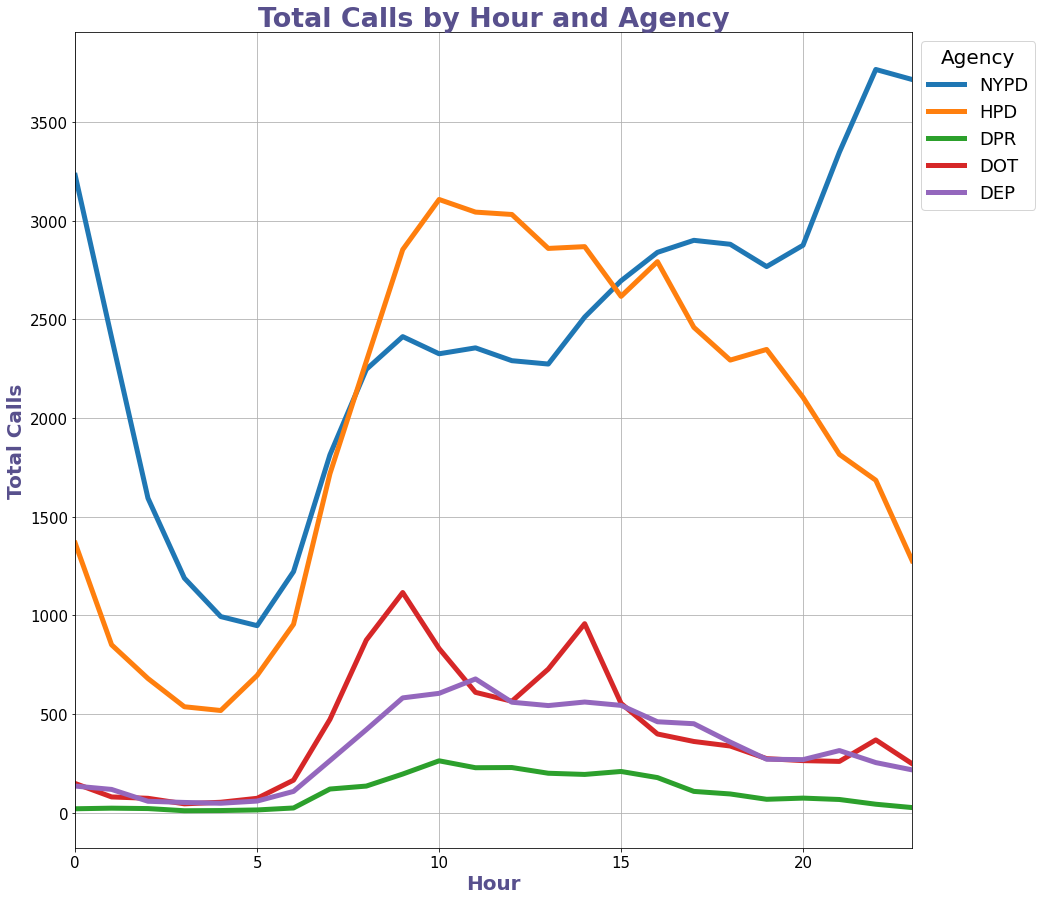

In [27]:
font_dict = dict(size=20, color="#58508d", fontweight='bold')
title_font_dict = dict(size=27, color="#58508d", fontweight='bold')

plt.figure(figsize=(15, 15))
plt.plot(NYPD.index, NYPD.NYPD, label="NYPD", linewidth=5)
plt.plot(HPD.index, HPD.HPD, label="HPD", linewidth=5)
plt.plot(DPR.index, DPR.DPR, label="DPR", linewidth=5)
plt.plot(DOT.index, DOT.DOT, label="DOT", linewidth=5)
plt.plot(DEP.index, DEP.DEP, label="DEP", linewidth=5)
plt.ylabel('Total Calls', fontdict=font_dict)
plt.xlabel('Hour', fontdict=font_dict)
plt.title('Total Calls by Hour and Agency', fontdict=title_font_dict)
plt.legend(title="Agency", title_fontsize=20, fontsize=18, 
           bbox_to_anchor=[1,1]) #position legend outside of plot
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(right=23) 
plt.xlim(left=0) 
plt.grid()

In [28]:
#Most calls to the NYPD are made between 8PM and 5AM. Calls to other top agencies, conversely, peak during the day.

### Call Volume by Complaint Type and Date

In [29]:
df.complaint_type.value_counts()

HEAT/HOT WATER                36430
Illegal Parking               18014
Noise - Residential           15010
Blocked Driveway               8101
Water System                   2911
                              ...  
Seasonal Collection               1
Dept of Investigations            1
Cooling Tower                     1
Recycling Basket Complaint        1
Poison Ivy                        1
Name: complaint_type, Length: 160, dtype: int64

In [30]:
## Using top complaint types

In [31]:
def date_call_freq_df(complaint_type):
  """Takes in a complaint type as a string. Returns a dataframe with dates 
     and the total number of calls related to the given complaint that were made 
     on each date."""
    
  subset = df[df.complaint_type==complaint_type]  
  call_freqs_by_date = {}
    
  for date in subset.day:
      if date not in call_freqs_by_date: 
            call_freqs_by_date[date] = 1
      else:
            call_freqs_by_date[date] += 1
    
  freq_df = pd.DataFrame.from_dict(call_freqs_by_date, orient='index', 
                                   columns=['{}'.format(complaint_type)])
  return freq_df.sort_index()

In [32]:
# call frequency dataframes for top 5 complaint types
heat_hot_water_Date = date_call_freq_df('HEAT/HOT WATER')
illegal_parking_Date = date_call_freq_df('Illegal Parking')
noise_residential_Date = date_call_freq_df('Noise - Residential')
blocked_driveway_Date = date_call_freq_df('Blocked Driveway')
noise_street_Date = date_call_freq_df('Noise - Street/Sidewalk')

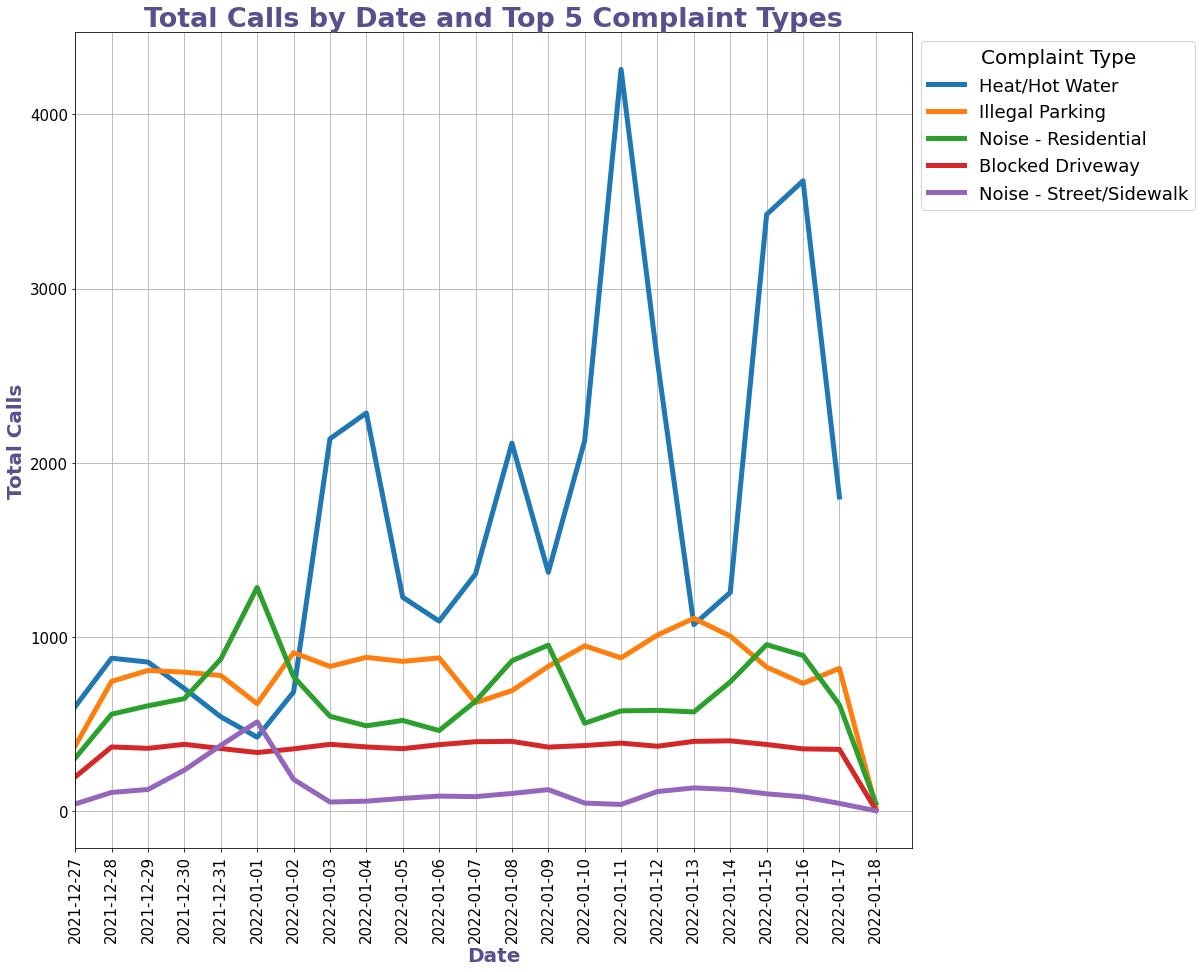

In [33]:
font_dict = dict(size=20, color="#58508d", fontweight='bold')
title_font_dict = dict(size=27, color="#58508d", fontweight='bold')

plt.figure(figsize=(15, 15))
plt.plot(heat_hot_water_Date.index, heat_hot_water_Date['HEAT/HOT WATER'], label="Heat/Hot Water", linewidth=5)
plt.plot(illegal_parking_Date.index, illegal_parking_Date['Illegal Parking'], label="Illegal Parking", linewidth=5)
plt.plot(noise_residential_Date.index, noise_residential_Date['Noise - Residential'], label="Noise - Residential", linewidth=5)
plt.plot(blocked_driveway_Date.index, blocked_driveway_Date['Blocked Driveway'], label="Blocked Driveway", linewidth=5)
plt.plot(noise_street_Date.index, noise_street_Date['Noise - Street/Sidewalk'], label="Noise - Street/Sidewalk", linewidth=5)
plt.ylabel('Total Calls', fontdict=font_dict)
plt.xlabel('Date', fontdict=font_dict)
plt.title('Total Calls by Date and Top 5 Complaint Types', fontdict=title_font_dict)
plt.legend(title="Complaint Type", title_fontsize=20, fontsize=18, 
           bbox_to_anchor=[1,1]) #position legend outside of plot
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.xlim(right=23) 
plt.xlim(left=0) 
plt.grid()

## - From 12-21-2021 - 01-13-2022

### Top 5 Complaint Types Frequency by Hour

In [34]:
def hour_complaint_freq_df(complaint_type):
  """Takes in a complaint type as a string. Returns a dataframe with dates 
     and the total number of calls related to the given complaint that were made 
     on each date."""
    
  subset = df[df.complaint_type==complaint_type]  
  call_freqs_by_hour = {}
    
  for hour in subset.hour:
      if hour not in call_freqs_by_hour: 
            call_freqs_by_hour[hour] = 1
      else:
            call_freqs_by_hour[hour] += 1
    
  freq_df = pd.DataFrame.from_dict(call_freqs_by_hour, orient='index', 
                                   columns=['{}'.format(complaint_type)])
  return freq_df.sort_index()

In [35]:
# call frequency dataframes for top 5 complaint types
heat_hot_water = hour_complaint_freq_df('HEAT/HOT WATER')
illegal_parking = hour_complaint_freq_df('Illegal Parking')
noise_residential = hour_complaint_freq_df('Noise - Residential')
blocked_driveway = hour_complaint_freq_df('Blocked Driveway')
noise_street = hour_complaint_freq_df('Noise - Street/Sidewalk')

In [36]:
# checking frequency dataframes
heat_hot_water.head(5)

,HEAT/HOT WATER
0,1157
1,731
2,585
3,456
4,448


In [37]:
heat_hot_water.shape

(24, 1)

In [38]:
noise_residential.head()

,Noise - Residential
0,1356
1,1012
2,758
3,563
4,447


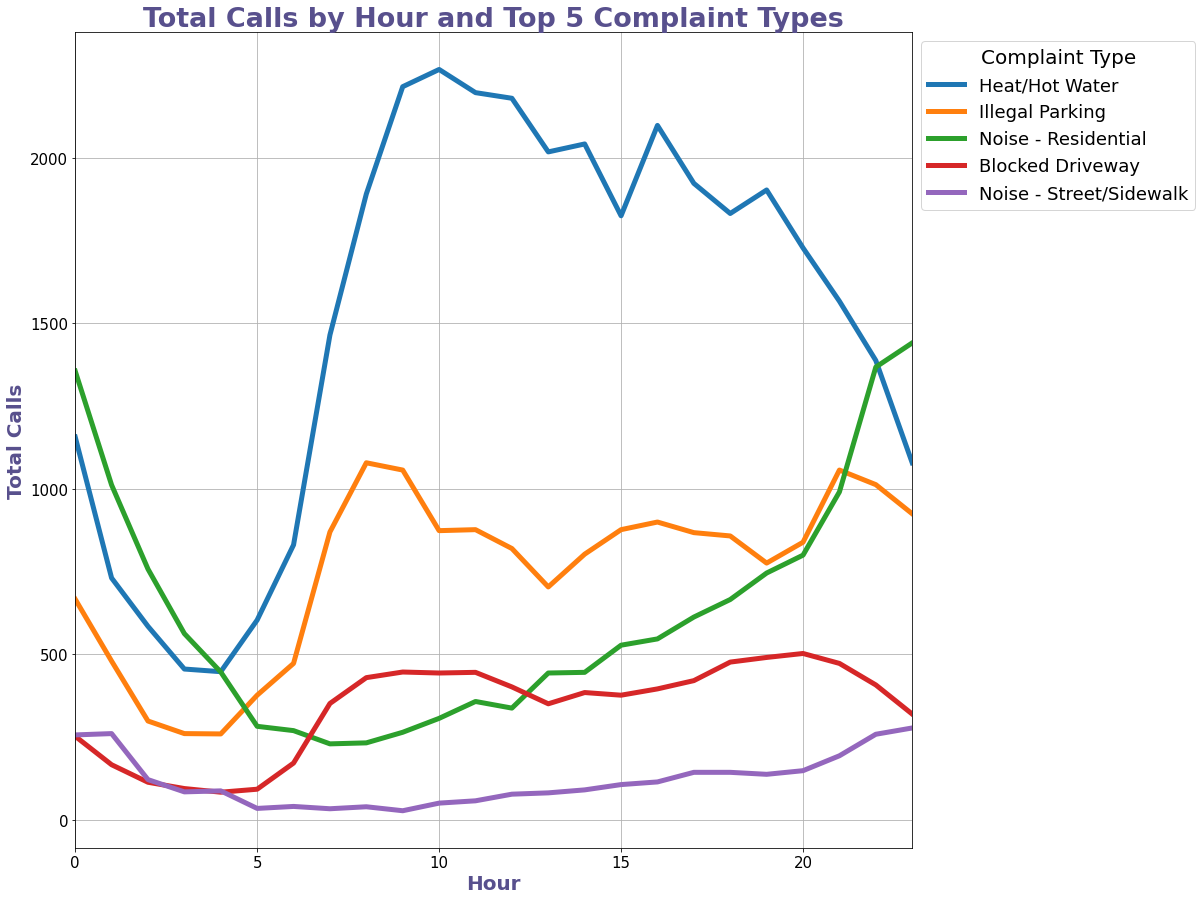

In [39]:
font_dict = dict(size=20, color="#58508d", fontweight='bold')
title_font_dict = dict(size=27, color="#58508d", fontweight='bold')

plt.figure(figsize=(15, 15))
plt.plot(heat_hot_water.index, heat_hot_water['HEAT/HOT WATER'], label="Heat/Hot Water", linewidth=5)
plt.plot(illegal_parking.index, illegal_parking['Illegal Parking'], label="Illegal Parking", linewidth=5)
plt.plot(noise_residential.index, noise_residential['Noise - Residential'], label="Noise - Residential", linewidth=5)
plt.plot(blocked_driveway.index, blocked_driveway['Blocked Driveway'], label="Blocked Driveway", linewidth=5)
plt.plot(noise_street.index, noise_street['Noise - Street/Sidewalk'], label="Noise - Street/Sidewalk", linewidth=5)
plt.ylabel('Total Calls', fontdict=font_dict)
plt.xlabel('Hour', fontdict=font_dict)
plt.title('Total Calls by Hour and Top 5 Complaint Types', fontdict=title_font_dict)
plt.legend(title="Complaint Type", title_fontsize=20, fontsize=18, 
           bbox_to_anchor=[1,1]) #position legend outside of plot
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(right=23) 
plt.xlim(left=0) 
plt.grid()


### Areas with Highest Number of Heat/Hot Water Complaints

In [53]:
## filter dataframe for only Heat/Hot Water Complaints
## Plot by County - bar plot
heat_complaint = df[df['complaint_type'] == 'HEAT/HOT WATER']
heat_complaint = heat_complaint.groupby('community_board').size().to_frame('size')

In [58]:
heat_complaint = heat_complaint.sort_values(by=['size'],ascending=False)
heat_complaint

,size
community_board,
12 MANHATTAN,2320
07 BRONX,2098
05 BRONX,1963
04 BRONX,1879
10 MANHATTAN,1488
...,...
02 STATEN ISLAND,67
03 STATEN ISLAND,59
01 MANHATTAN,21


In [65]:
heat_complaint = heat_complaint.iloc[0:10]
heat_complaint

,size
community_board,
12 MANHATTAN,2320
07 BRONX,2098
05 BRONX,1963
04 BRONX,1879
10 MANHATTAN,1488
09 BRONX,1306
14 BROOKLYN,1197
12 BRONX,1055
09 BROOKLYN,1051


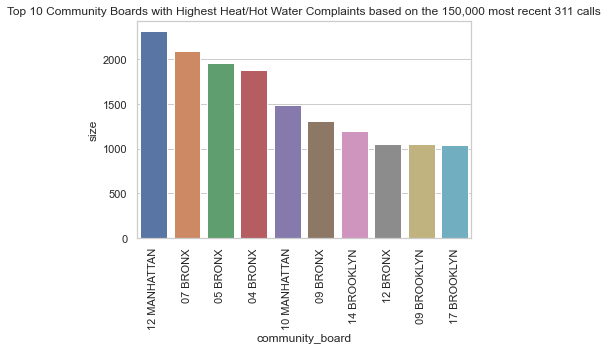

In [69]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=heat_complaint.index, y=heat_complaint['size'])
ax.set_title('Top 10 Community Boards with Highest Heat/Hot Water Complaints based on the 150,000 most recent 311 calls')
ax.tick_params(axis='x', rotation=90)

### Areas/County and their most frequent complaint type

In [142]:
lead_complaint = df.groupby(['borough','complaint_type']).size().to_frame('size')
lead_complaint = lead_complaint.reset_index()
lead_complaint

,borough,complaint_type,size
0,BRONX,APPLIANCE,183
1,BRONX,Abandoned Bike,2
2,BRONX,Abandoned Vehicle,402
3,BRONX,Air Quality,25
4,BRONX,Animal in a Park,9
...,...,...,...
684,Unspecified,Street Condition,4
685,Unspecified,Street Light Condition,29
686,Unspecified,Taxi Complaint,3
687,Unspecified,Taxi Report,2


In [102]:
#lead_complaint_size = lead_complaint.groupby(['borough']).agg({'size': max})
#lead_complaint_size

In [143]:
lead_complaint = lead_complaint.sort_values(by='size', ascending=False)
lead_complaint = lead_complaint.drop_duplicates(subset=['borough'], keep='first')

In [144]:
lead_complaint.drop(lead_complaint[lead_complaint['borough'] == 'Unspecified'].index, inplace = True)

In [132]:
lead_complaint

,borough,complaint_type,size
48,BRONX,HEAT/HOT WATER,13316
181,BROOKLYN,HEAT/HOT WATER,9908
323,MANHATTAN,HEAT/HOT WATER,7969
473,QUEENS,Illegal Parking,5645
614,STATEN ISLAND,Missed Collection,557


In [145]:
lead_complaint['borough_complaint'] = lead_complaint['borough'] + ' - ' + lead_complaint['complaint_type']

In [146]:
lead_complaint.head()

,borough,complaint_type,size,borough_complaint
48,BRONX,HEAT/HOT WATER,13316,BRONX - HEAT/HOT WATER
181,BROOKLYN,HEAT/HOT WATER,9908,BROOKLYN - HEAT/HOT WATER
323,MANHATTAN,HEAT/HOT WATER,7969,MANHATTAN - HEAT/HOT WATER
473,QUEENS,Illegal Parking,5645,QUEENS - Illegal Parking
614,STATEN ISLAND,Missed Collection,557,STATEN ISLAND - Missed Collection


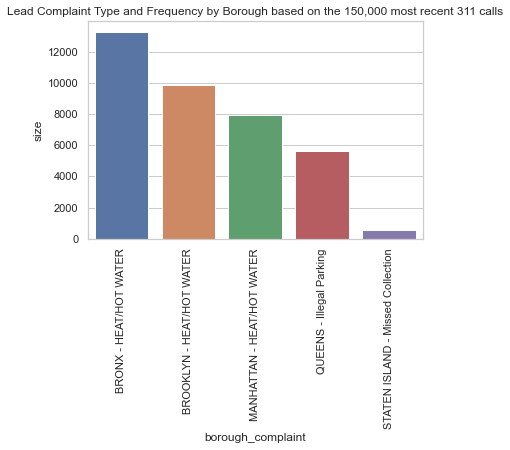

In [147]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=lead_complaint.borough_complaint, y=lead_complaint['size'])
ax.set_title('Lead Complaint Type and Frequency by Borough based on the 150,000 most recent 311 calls')
ax.tick_params(axis='x', rotation=90)